# Exploratory Data Analysis

### Objectives

After this lesson you should be able to...
1. Know how to gain intuition about any dataset
1. Interview datasets and tell their story
1. Know the difference between exploratory data analysis (EDA) and statistical modeling
1. Know the difference between a categorical and a continuous variable
1. Know the difference between an ordinal and nominal categorical variable
1. Know the difference between univariate and bivariate data
1. Know graphical and non-graphical EDA techniques to apply to univariate and bivariate data

### Resources
1. Watching this lecture on EDA from the University of Virginia
1. Read [chapter 4 of this book](http://www.stat.cmu.edu/~hseltman/309/Book/) by Howard Seltman (highly recommended)
1. Read about the [categorical data type](http://pandas.pydata.org/pandas-docs/stable/categorical.html) in the pandas documentation.

More Resources
1. [Udacity class on EDA in R](https://classroom.udacity.com/courses/ud651)
1. [Stanford Visualization Class](http://web.stanford.edu/class/cs448b/cgi-bin/wiki-fa16/index.php?title=Main_Page)
1. [Great blog post on diamonds EDA](https://solomonmessing.wordpress.com/2014/01/19/visualization-series-the-scatterplot-or-how-to-use-data-so-you-dont-get-ripped-off/)
1. [Kaggle Winner Interviews](http://blog.kaggle.com/category/winners-interviews/)

# Introduction
The data science process diagram above is a decent representation of what an end-to-end data analysis workflow would look like. Depending on how the terms are defined and who is working on the data, exploratory data analysis can be moved to the step immediately after raw data collection. 

Before we go into EDA, let's define the roles of the people involved in a data analysis.

### Data Engineer vs Data Scientist
At a high level, data engineers build the infrastructure for raw data collection. The data scientist explores and transforms the data and if warranted builds a model. The intelligence of this model is then distributed via a data product, usually a web application, visualization tool or a report. 

Some organizations have many more people involved such as solutions architects, data modelers, database admins, project managers, web developers and so forth that are all part of the data pipeline. Other organizations might have data scientists do the entire workflow and you will likely be on your own for your personal projects.

### Stakeholders, domain experts and communicating results
Stakeholders, as they are called in the corporate world, have a large vested interest in the project. They will help build and refine the requirements as the project continues. Generally stakeholders will have more fundamental (domain) knowledge about the project than the data scientists. 

It is imperative for the data scientists to work tightly with those that possess domain knowledge. Business data is generally very complex and difficult to understand from the data alone.

### Doing a small project alone - Get Feedback
Even if you are doing a project on your own, it is very important to present the results to someone besides yourself to get feedback.

### This notebook
In this notebook, the journey begins once the data is in your hands. It may or may not have been processed before but now its yours and you have to make sense of it.

# Developing a Data Analysis Routine
Do you have a plan when the data gets in your hands or do you just randomly explore data until you reach a conclusions? Developing a routine can help you ensure that you have followed a common set of procedure for all data analysis. This is no different than an airline pilot going through their routine safety checks or a professional golfer approaching each golf shot the same way. The notebook **EDA Checklist** lists all of the ideas mentioned in this notebook and can be used as a template for developing your own routine.

### Common sense before starting an analysis
Regardless if there exist well-organized requirements for a project that you are tasked with, answers to some common sense questions may help before starting. For any dataset that lands in your hands its, answers to the following questions can help:

* What process generates this data?
* Is it generated from industrial equipment, a website, internal software?
* When was it created?
* How often is it updated?
* What database(if any) is it stored in?
* Who are the admins of the database?
* Can you view the schema?
* What is the process that the raw data has gone through before it reached your hands? Has it already been pre-processed before it reaches you?
* Is there a data dictionary describing every column?
* What systems use the data?
* Have their been previous data scientists working with this dataset?
* How has data changed over time? Which columns have been added/subtracted? 
* Is data for some columns not being collected?
* Is there a document with detailed descriptions on the data?
* Can you get some minimal domain knowledge before beginning the analysis?

### Interview your data - make a documentary
The questions above are the start of an interviewing process that you will begin having with your data. By the end of the interview you should have enough material to produce a 'documentary' describing what the story is with your data. This is exploratory data analysis.

EDA is like an attitude you take with you when you possess a dataset. By asking questions and answering them both graphically and non-graphically, a story will eventually emerge. This story can then be used to do more formal, rigorous statistical analyses. 

### [History of EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
[EDA] was coined by a famous statistician John Tukey in the 1970's to summarize an approach for characterizing data supplemented heavily by visualizations. Tukey is known for [some famous stats quotes](http://www.azquotes.com/author/14847-John_Tukey).

> "When communicating results to non-technical types there is nothing better than a clear visualization to make your point." - John Tukey

### Importance of EDA
There are many analogies that can be used... 

Jumping to statistical modeling before doing EDA is like...
1. A doctor immediately anesthetizing all patients upon their first visit and performing surgery to complete a routine medical exam
1. Using a sledge hammer to crack an egg
1. Using a chain saw to slice a piece of cheese  
...

### Visualization is the primary tool of EDA
The primary investigative results that your EDA should produce are visualizations. Enormous research and thought has gone into what makes a good data visualization. Seaborn and pandas automatically take care of much of this for us. Use the resources section above for more info.

### Descriptive statistics are a close second
Along with visualizations come descriptive statistics. A good data visualization should contain most of what can be calculated and outputted into a table. Nevertheless, summary statistics give precise information. 

### No formal hypothesis testing 
EDA does not usually concern itself with formal statistical hypothesis testing. Statistical analysis is still done by calculating descriptive statistics and correlations. Also, checking for assumptions, whether a variable is the distribution normally distributed for example, or whether a pair of variables are independent is occasionally done as well.

# EDA with Diamonds
One of the most popular datasets for beginning exploration is the [diamonds dataset made famous by the ggplot2](http://ggplot2.tidyverse.org/reference/diamonds.html) R visualization library. Python has a replica library with the name **`ggplot`**. This package does not ship with Anaconda so you will have to conda/pip install it. Let's import the data.

## Subject Matter Research
Before we look at the data, it can massively help to do some research on the subject matter of your data. It is very tempting to dive into the dataset but you should consider reading articles or meeting with the domain experts.

The diamonds dataset was scraped from the [diamond search engine](http://www.diamondse.info/) in 2018. Go there now and use their search engine to manually inspect the data. There are also short articles on several different diamond characteristics including cut, color, clarity and carat.

In most datasets in the wild, you will typically not be an expert in the domain of your data. You will likely have to do quite a bit more reading to fully understand the domain you are doing an analysis in. Communicating directly with domain experts is imperative. 

Many [kaggle competitions](http://kaggle.com/) are won by the groups that do extra reading of scientific literature to greatly enhance their understanding of the problem domain and therefore better understand the data better, transform the data and manufacture new variables (feature engineering). The domain for diamonds is very well known. You can read more on [diamonds here]( (https://www.bluenile.com/education/diamonds).

## Problem Formalization Yes/No/Does it matter?
It isn't necessary to have a formalized problem definition when beginning your data exploration. Of course, there are many times when you will be given a formal task to undertake but regardless EDA can always be performed and sometimes its easier to be unbiased when you don't have a formal problem. When you do have a formalized problem, its still good to begin the data analysis as if you were blind from it.

## Messy journals to formal report
Jupyter notebooks are excellent portals to keep the entire history of a data analysis. Just like a journal of hand-written notes, your first data exploration might me messy and these notebooks are particularly prone to messiness. I suggest creating a new and clean notebook once you have completed your first draft of exploratory analysis. 

## Business data is very complex
This diamond dataset is going to be much simpler than most of the business data you will encounter working as an analyst for a corporation. Business data can come from many different sources, be wildly inconsistent, change dimensions over time and have a whole host of other problems.

# Beginning to peek into the data
Once you have done your answered the questions above and done your research you are nearly ready to look at your data. One of the first things you will want to do is find the data dictionary if it exists.  

## The Data Dictionary
The data dictionary is a file that contains information about your dataset. If the data came from a relational database, you should be able to contact the owner and view the [schema](http://support.smartbear.com/support/media/images/support/kb/data/2011/1/31/info-database-schema.jpg) This data on the data is called **metadata**.

If there is no data dictionary, you need to create it as you complete your EDA. Even if a data dictionary exists you need to modify it and continually add notes to it. A spreadsheet is a good choice of a file for a data dictionary. You can have columns for:
* Column Name
* Data Type
* Range of values
* Notes

Let's look at the data dictionary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_colwidth = 120
diamonds_dictionary = pd.read_csv('../data/diamonds_dictionary.csv', index_col='Column Name')
diamonds_dictionary 
# 1st step: create data dictionary
# nice introduction about the data.

,Description
Column Name,
carat,weight of the diamond (0.2--5.01)
clarity,"a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))"
color,"diamond colour, from J (worst) to D (best)"
cut,"quality of the cut (Fair, Good, Very Good, Premium, Ideal)"
depth,"total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)"
price,"price in US dollars ($326--$18,823)"
table,width of top of diamond relative to widest point (43--95)
x,length in mm (0--10.74)
y,width in mm (0--58.9)


## Inspect the first few rows
Let's look at the head of the DataFrame and inspect the first few rows.

In [2]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Is the data tidy?
Once you first take a look at your data, you need to determine if it is tidy or not. For that you need to review the tidy notebook or as summary - answer the following questions.
* Is every column a variable?
* Is every row an observation?
* Is every table a single observational unit?

To answer these questions you need to identify your variables first. Lots of data that will end up in your hands will come from a formal relational database. Much of this data is already tidy. Data from excel spreadsheets, government data, summarized data from web scraping, etc.. will usually not be tidy and you will need to work on tidying the data first before doing any analysis.

Our diamond dataset is tidy. All column names represent variables and each row is a single observation and from the little we know on diamonds it appears that the whole table is one observational unit. We could possibly think about putting x, y, z, table and depth in a separate table as they all relate to measurements but having all the columns together makes for easier analysis.

# Data Types
Once we determine that the data set is tidy, we can find the data types of each column. We can do this with the **`.dtypes`** attribute. Care needs to be taken here as it possible an actual numeric column is determined by pandas to be a string (object) column. This happens when there exists one or more strings in a column. The entire column gets converted to object. But, in this dataset that doesn't appear to be the case.

In [3]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Update the data dictionary

In [4]:
diamonds_dictionary2 = diamonds_dictionary.copy()
diamonds_dictionary2['Data Type'] = diamonds.dtypes #indexes auto-align

In [5]:
diamonds_dictionary2

,Description,Data Type
Column Name,,
carat,weight of the diamond (0.2--5.01),float64
clarity,"a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))",object
color,"diamond colour, from J (worst) to D (best)",object
cut,"quality of the cut (Fair, Good, Very Good, Premium, Ideal)",object
depth,"total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)",float64
price,"price in US dollars ($326--$18,823)",int64
table,width of top of diamond relative to widest point (43--95),float64
x,length in mm (0--10.74),float64
y,width in mm (0--58.9),float64


## Types of variables: Categorical or Continuous
The two broad classes of variables in a dataset are categorical and continuous. Categorical data is limited to finite, discrete values and can be labels or discrete numerical values. Continuous variables can take on an infinite set of numerical values. Different visualizations work better for each case. Descriptive statistics don't well on categorical data as taking the mean of gender doesn't make sense.

### Types of categorical data: ordinal or nominal
Categorical data can be further subdivided into two different types - ordinal and nominal. Ordinal data has a natural ordering but the difference between the orders is not measurable. Cancer is usually categorized into 4 stages with 4 being the worst. It is not clear how much worse stage 4 is than stage 3. Nominal data is any other type of categorical data that has no natural ordering like type of coffee or hair color or TV show.

Let's add a further classification to our data dictionary.

In [6]:
c, o, n = 'continuous', 'ordinal', 'nominal' # assign

In [7]:
d = {'carat':c, 'clarity':o, 'color':o, 'cut':o, 'depth':c, 'price':c, 'table':c, 'x':c, 'y':c, 'z':c}
diamonds_dictionary2['Data Type Info'] = pd.Series(d)
diamonds_dictionary2

,Description,Data Type,Data Type Info
Column Name,,,
carat,weight of the diamond (0.2--5.01),float64,continuous
clarity,"a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))",object,ordinal
color,"diamond colour, from J (worst) to D (best)",object,ordinal
cut,"quality of the cut (Fair, Good, Very Good, Premium, Ideal)",object,ordinal
depth,"total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)",float64,continuous
price,"price in US dollars ($326--$18,823)",int64,continuous
table,width of top of diamond relative to widest point (43--95),float64,continuous
x,length in mm (0--10.74),float64,continuous
y,width in mm (0--58.9),float64,continuous


## Rearranging the column order
You should not accept the default column ordering of your dataset. It might be sufficient but once the data is in your hands, you have control to change it. Even though the diamonds dataset only has 10 columns, we can still rearrange it such that it is more meaningful. One simple arrangement is to have the categorical variables come first with the most followed by the continuous ones. Hadley Wickham suggest having the 'fixed' variables first followed by the 'measured' variables. 

Often, when we are doing supervised machine learning we put the column we would like to predict at the very end. Let's rearrange our diamonds dataset so that the three categorical variables come first followed by the numeric variables carat and price. The other five variables are similar to each other and go last.

You are of course free to choose the order of the variables that best makes sense to you. Some groups of data scientists will want to standardize on a set of guidelines of column ordering. 

In [8]:
# old order
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
new_order = ['cut', 'color', 'clarity','carat', 'price', 'x', 'y','z','depth', 'table']
diamonds = diamonds[new_order]
diamonds.head()

,cut,color,clarity,carat,price,x,y,z,depth,table
0,Ideal,E,SI2,0.23,326,3.95,3.98,2.43,61.5,55.0
1,Premium,E,SI1,0.21,326,3.89,3.84,2.31,59.8,61.0
2,Good,E,VS1,0.23,327,4.05,4.07,2.31,56.9,65.0
3,Premium,I,VS2,0.29,334,4.20,4.23,2.63,62.4,58.0
4,Good,J,SI2,0.31,335,4.34,4.35,2.75,63.3,58.0


## A bit more metadata
Let's get the number of observations and the number of missing values for each column.

In [10]:
diamonds.shape

(53940, 10)

In [11]:
diamonds.isna().sum()

cut        0
color      0
clarity    0
carat      0
price      0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

In [12]:
# additionally you could call .info
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
carat      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
depth      53940 non-null float64
table      53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Append the number of missing values to the data dictionaray

In [13]:
diamonds_dictionary2['Missing Values'] = diamonds.isna().sum()
diamonds_dictionary2

,Description,Data Type,Data Type Info,Missing Values
Column Name,,,,
carat,weight of the diamond (0.2--5.01),float64,continuous,0
clarity,"a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))",object,ordinal,0
color,"diamond colour, from J (worst) to D (best)",object,ordinal,0
cut,"quality of the cut (Fair, Good, Very Good, Premium, Ideal)",object,ordinal,0
depth,"total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)",float64,continuous,0
price,"price in US dollars ($326--$18,823)",int64,continuous,0
table,width of top of diamond relative to widest point (43--95),float64,continuous,0
x,length in mm (0--10.74),float64,continuous,0
y,width in mm (0--58.9),float64,continuous,0


# Your Turn #1
Go to the library Notebook and perform the same steps on the human resources dataset.

In [14]:
# Code over there


# Univariate vs Bivariate (and multivariate) Analyses
Univariate analysis is done on one variable at a time. Bivariate or multivariate is analysis done on 2 or more variables.

### Graphical vs Non-graphical
Each exploratory analysis will either result in a graph or some numbers representing the data.

# Summarizing
To help guide you on your exploratory data analysis, a suggested plot/table is given in the 10 table cells below.

| Univariate             | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical | Bar char of frequencies (count/percent) | Contingency table (count/percent) |
| Continuous  | Histogram/rugplot/KDE, box/violin/swarm, qqplot, fat tails  | central tendency -mean/median/mode, spread - variance, std, skew, kurt, IQR  |

| Bivariate/multivariate            | Graphical                               | Non-Graphical                     | 
|-------------|-----------------------------------------|-----------------------------------|
| Categorical vs Categorical | heat map, mosaic plot | Two-way Contingency table (count/percent) |
| Continuous vs Continuous  | all pairwise scatterplots, kde, heatmaps |  all pairwise correlation/regression   |
| Categorical vs Continuous  | [bar, violin, swarm, point, strip seaborn plots](http://seaborn.pydata.org/tutorial/categorical.html)  | Summary statistics for each level |

### Beginning with Univariate Analysis
After you have tidied the data and began the data dictionary, a reasonable place to start is with univariate analysis. 

### Categorical or Continuous
The **`dtypes`** method outputs the pandas data types but does not directly tell us whether the variable is continuous or categorical. pandas uses the data type **`object`** to represent strings and non-numeric/boolean/date python objects. It is a catch-all data type but most frequently will denote a column of strings.

Strings must be categorical data, there cut, color, and clarity are all categorical data. They are all ordinal variables as well as each has a natural ordering from worst to best. 

Numeric variables are not necessarily all continuous. Columns with limited discrete numeric values are candidates for being categorical data. Movie ratings or year of birth are two classic examples of numeric categorical variables. From the descriptions, the numerical columns can take on any value within the given range and so treating them as a continuous value ma

### Treating continuous variables as categorical
Occasionally, it makes sense to treat each unique value of a continuous variable as a level of a categorical variable. The most common situation for this is when there are very few unique values for the continuous variable. 

### Binning continuous variables
It is also possible to bin continuous variables into categories. We are all naturally fond of this when receiving grades: 90 - 100 is mapped to an **A** with 80 - 89 mapped to **B** and so on.

### Get count of unique values for each
The **`nunique`** DataFrame method returns the count of unique values for each column. This can help determine if a continuous variable might be served best as categorical. From the table below, only the categorical columns have small unique counts.

In [15]:
diamonds.nunique() #find number of unique values in each column

cut            5
color          7
clarity        8
carat        273
price      11602
x            554
y            552
z            375
depth        184
table        127
dtype: int64

In [16]:
# filter for non-object columns first
diamonds.select_dtypes(exclude='object').nunique() 

carat      273
price    11602
x          554
y          552
z          375
depth      184
table      127
dtype: int64

### Univariate analysis: Interview each column
Univariate analysis is simply an analysis done on one variable. For smaller datasets, I like to manually examine each variable. This way, I can learn the distribution of each variable, discover potential outliers, missing values and simplify matters by concentrating on only variable at a time.

Non-graphical univariate analysis for categorical data is pretty bland as there is not much to do except report the count or relative frequency. 

There are more options when doing univariate analysis on continuous variables. Tukey proposed a 5 number summary: min, max, median and first and third quartiles (IQR - interquartile range). Boxplots are great for detecting possible outliers and histograms and kernel density plots (KDE) are excellent for examining the distribution.

### Quick and dirty with `describe`
The **`describe`** method gives the 5 number summary along with the mean, standard deviation and number of non-missing values (labeled **count**) for all continuous variables and the frequency and max occurring for categorical. By default **`describe`** method uses only the continuous variables. Use the **`include`** parameter to change the data types it uses for the summary.

In [3]:
diamonds.describe() # for numeric columns

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
diamonds.describe(perentiles = [-.01, 0.1, .2, .3, .4, .99]) # for numeric columns

TypeError: describe() got an unexpected keyword argument 'perentiles'

### Univariate analysis on the categorical variables
The frequency of occurrence of each value by raw count and percentage is usually the first (and many times only exploratory step taken) when doing univariate categorical analysis. The **`value_counts`** Series method will be useful here.

In [18]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [19]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [20]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [21]:
# use normalize=True to get percentage
diamonds['cut'].value_counts(normalize=True).round(2)

Ideal        0.40
Premium      0.26
Very Good    0.22
Good         0.09
Fair         0.03
Name: cut, dtype: float64

### Outliers for categorical variables
Categorical columns that have values with very few counts may be considered an outlier. One technique to remove the values is to have a count threshold and change any value that appears less than the threshold to 'other'.

### Changing `object` to `category`
pandas has a much better data type than **`object`** for actual categorical variables properly. Changing the column to type **`category`** does several things. It saves memory by encoding each category as a numerical value. It's possible to sort by the category order and not the natural lexicographical order. Also, the **`.cat`** accessor makes many more methods available.

For converting an **`object`** to a nominal variable simply use **`.astype('category')`** to the column you want to convert.

Ordinal variables can be given their ordering through the **`categories`** parameter with **`ordered`** set equal to **`True`**.

In [22]:
diamonds['cut'] = diamonds['cut'].astype('category', 
                                         categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                         ordered=True)

/Users/Ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# notice that the data type is now a categiry and the categories are ordered
diamonds.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

### Convert color and clarity to category

In [24]:
diamonds['color'] = diamonds.color.astype('object')

In [25]:
diamonds['color'] = diamonds['color'].astype('category', 
                                             categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'], 
                                             ordered=True)

diamonds['clarity'] = diamonds['clarity'].astype('category', 
                                                 categories=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
                                                 ordered=True)

/Users/Ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ted/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys


### Sort by frequency and then by category
The **`value_counts`** method works as before by showing the frequencies in descending order. Chaining the **`sort_index`** method displays the power of pandas categorical variables by sorting by the given categorical order.

In [26]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [27]:
diamonds['color'].value_counts().sort_index()

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

In [28]:
# percentages
diamonds['color'].value_counts(normalize=True).round(3).sort_index()

J    0.052
I    0.101
H    0.154
G    0.209
F    0.177
E    0.182
D    0.126
Name: color, dtype: float64

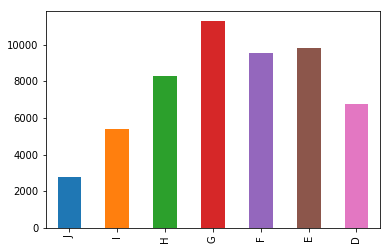

In [29]:
diamonds['color'].value_counts().sort_index().plot(kind='bar')

### Seaborn sorts axis automatically
Conveniently, seaborn sorts the categorical variable axis.

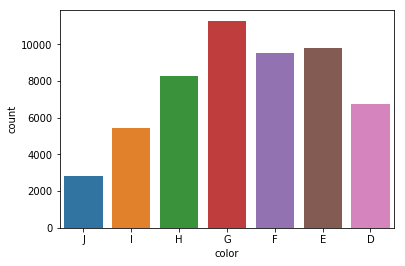

In [30]:
sns.countplot(x='color', data=diamonds)

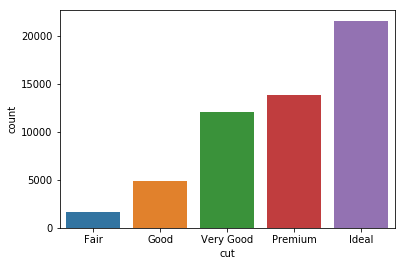

In [31]:
sns.countplot(x='cut', data=diamonds)

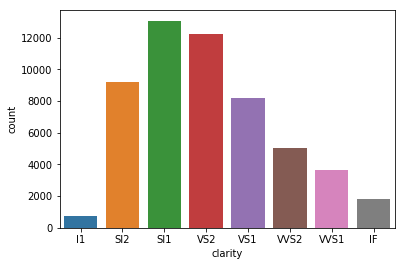

In [32]:
sns.countplot(x='clarity', data=diamonds)

### Pie charts are evil
Lots of data visualization experts say to [avoid pie charts](https://www.quora.com/How-and-why-are-pie-charts-considered-evil-by-data-visualization-experts).

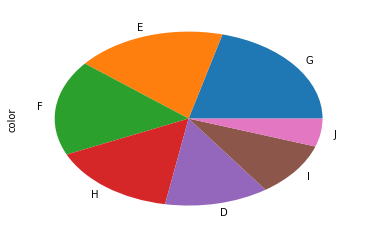

In [33]:
diamonds.color.value_counts().plot(kind='pie')

# Your turn #2
Do univariate analysis on the categorical columns. Convert them to the `category` type.

In [34]:
# code on other notebook

### Feature Engineering Columns of Strings
Categorical columns don't lend themselves to much exploratory data analysis. Features (new variables) may be created from strings. For instance, the first or last letter can be pulled out into its own column for further analysis. The second word of a sentence, the count of the number of vowels and so forth.

Just because a column is a string does not mean a single bar plot of frequencies ends the analysis.

### Univariate analysis on carat
carat is numerical and therefore a much larger array of statistics may be generated to describe the variable. A boxplot is great to see some measure of spread and have some cut-off for outliers, defaulting to 1.5 times the IQR. There appear to be quite a few outliers, seen by the dots beyond the whisker of the plot below.

The density of the distribution is not visible with a box plot. For all I know, 99.9% of the data could be less than 2. The violin plot helps alleviate this issue by plotting the distribution and not a box. The violin plot gives indication that indeed a huge percentage of values are less than 2.

Very similar to a violin plot is a swarm plot, which uses actual points to estimate a distribution. Because it is plotting raw points, the plotting surface can easily get overloaded, so 300 random points are sampled first and then plotted.

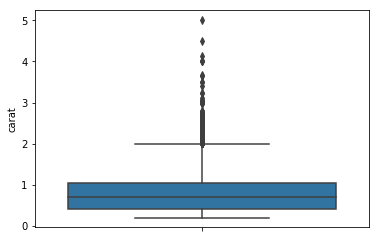

In [35]:
sns.boxplot(y='carat', data=diamonds)

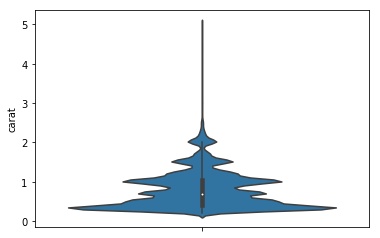

In [36]:
sns.violinplot(y='carat', data=diamonds)

### More precision about distribution
96% percent of the diamonds are 2 carats are less and 99.7% are 2.5 carats or less. 99% of the diamonds are between .23 and 2.31 carats.

In [37]:
(diamonds['carat'] < 2).mean(), (diamonds['carat'] < 2.5).mean()

(0.9600667408231368, 0.9973489061920653)

In [38]:
diamonds['carat'].quantile([.005, .995])

0.005    0.23
0.995    2.31
Name: carat, dtype: float64

This histogram shows a bi-modal distribution which is also seen in the violin/swarm plots. I wonder why this is so?

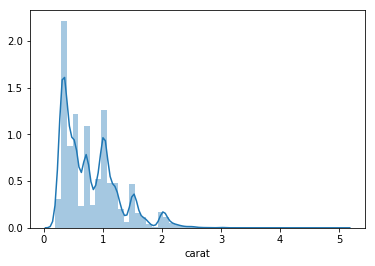

In [39]:
sns.distplot(diamonds['carat'])

### Know the shape of the distribution
One of the main goals of univariate, continuous variable analysis is to know the shape of the data. Knowing the shape of the distribution is akin to knowing the elevation of an entire mountain range - you know where the peaks and valleys are and in which direction contains the most mountains.

Practically, you know where the vast majority (80-90%) of the data lie between, which direction (if any) does it skew too, the 'fatness' of the tails and the 'peakedness'.

### Sample and Unseen data
A major goal towards the end of the data science process is to build a model that accurately represents reality. This will typically be some model that uses machine learning to make predictions about future data inputs. Your model is put to the test on **unseen** data. A good model will be able to **generalize** well to unseen data.

Any dataset that you are working on is just one **sample** of all the possible data that could be generated. The next batch of data from the same process might look different. If you build a model or produce an exploratory report that describes the sample but does not generalize to describing other samples then you might have **overfit** your analysis to the particular sample at hand.

Statisticians have formal procedures for estimating confidence bands around statistics. A more visual and exploratory approach involves the [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics).

### Bootstrap to estimate statistics
Boostrapping works by sampling your own dataset repeatedly and generating descriptive statistics, such as the standard deviation, for each resampling. After calculating the standard deviation (for example) of each bootstrapped sample, the distribution of the standard deviation can now be estimated.

### Estimating standard deviation from carat by bootstrapping
The below code, resamples with replacement the entire diamonds dataset 100 times. It creates a new dataset the same size as the old and calculates a standard deviation. These 100 values are then plotted. The distribution appears fairly normal and the range is small so we can be fairly confident that the standard deviation we calculated is going to be close to the real standard deviation.

In [40]:
diamonds['carat'].std()

0.47401124440538067

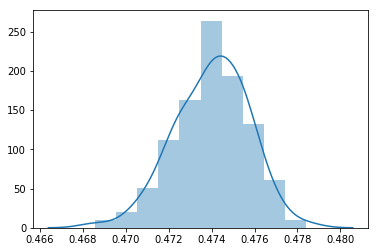

In [41]:
sns.distplot([diamonds['carat'].sample(frac=1, replace=True).std() for i in range(100)])

# Your Turn #3
Complete some univariate analysis on some continuous variables from the hr dataset.

In [42]:
# Code over there

## Outliers (in one dimension)
There is no formal statistical definition of an outlier but generally speaking, we think of outliers as being an abnormal observation distant from other points. There has been lots of research [dedicated to outlier detection](https://en.wikipedia.org/wiki/Outlier#Detection) but for our purposes we will concentrate on allowing our natural human ability to notice slight imperfections from a standard.

Box plots are great tools for visually detecting outliers. Seaborn (and most other plotting tools) defaults to labeling outliers as any observation more than 1.5 times the IQR beyond either the first or third quartiles.

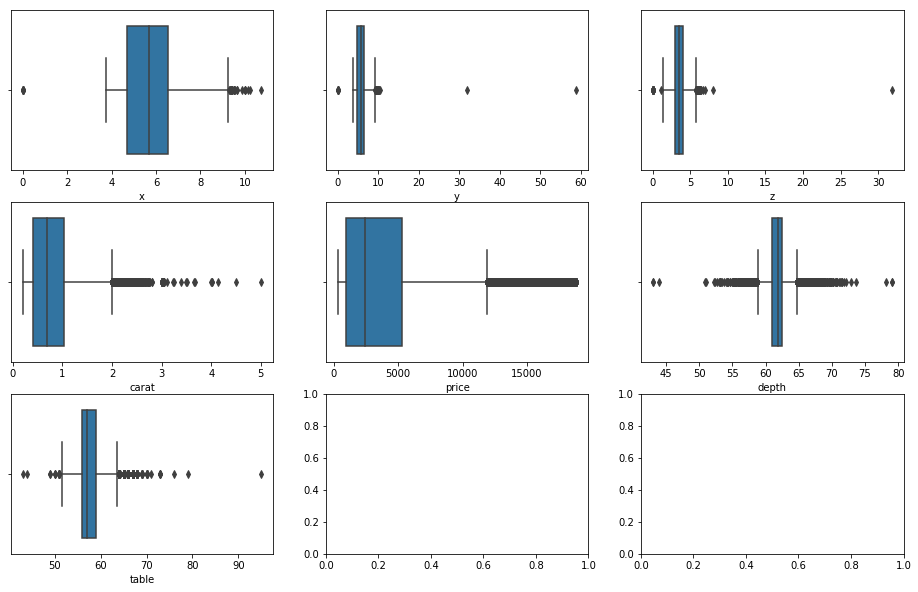

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10), sharex=False, sharey=False)

sns.boxplot(x='x', data=diamonds, ax=axes[0,0])
sns.boxplot(x='y', data=diamonds, ax=axes[0,1])
sns.boxplot(x='z', data=diamonds, ax=axes[0,2])
sns.boxplot(x='carat', data=diamonds, ax=axes[1,0])
sns.boxplot(x='price', data=diamonds, ax=axes[1,1])
sns.boxplot(x='depth', data=diamonds, ax=axes[1,2])
sns.boxplot(x='table', data=diamonds, ax=axes[2,0])

### Handling outliers
During EDA, we are not necessarily interested in taking an action on the outlier. Labeling it and investigating it further are primary. A decision can be made later to determine if it was an input error or a fairly recorded value. 

The easiest way to handle them is to delete them and make note of them. Applying a transformation (scaling, normalizing, taking log, etc...) is probably the most popular way of accounting for them. It's also possible to attempt to build a model from the rest of the data to predict what that value should have been. Capping the value at some fixed max/min could work as well.

### Labeling the outliers
A column will now be created to label the outliers

In [44]:
outliers = ((diamonds['x'] < 3) | (diamonds['y'] > 30) | (diamonds['y'] > 20) | 
            (diamonds['carat'] > 4) | (diamonds['depth'] < 45) | (diamonds['depth'] > 75) |
            (diamonds['table'] < 40) | (diamonds['table'] > 90)).astype(int)

In [46]:
diamonds['outliers'] = outliers
filt = diamonds['outliers'] == 1
diamonds[filt]

,cut,color,clarity,carat,price,x,y,z,depth,table,outliers
4518,Fair,G,SI1,1.00,3634,6.32,6.27,3.97,43.0,59.0,1
6341,Fair,G,VS2,1.00,4032,6.31,6.24,4.12,44.0,53.0,1
10377,Ideal,J,VS2,1.09,4778,6.53,6.55,4.12,43.0,54.0,1
11182,Ideal,F,SI2,1.07,4954,0.00,6.62,0.00,61.6,56.0,1
11963,Very Good,H,VS2,1.00,5139,0.00,0.00,0.00,63.3,53.0,1
15951,Fair,G,VS1,1.14,6381,0.00,0.00,0.00,57.5,67.0,1
24067,Premium,H,SI2,2.00,12210,8.09,58.90,8.06,58.9,57.0,1
24520,Ideal,G,VS2,1.56,12800,0.00,0.00,0.00,62.2,54.0,1
24932,Fair,F,SI1,2.01,13387,8.32,8.31,4.87,58.6,95.0,1
25998,Premium,I,I1,4.01,15223,10.14,10.10,6.17,61.0,61.0,1


### Comments on outliers
* There are 7 rows with x,y,z all equal to 0. These variables must be positive, so they can't possibly be correct. 
* The two y values over 30mm can't possibly be right as one of them would be wider than the largest diamond ever found and the price is much too low.

### Calculated Depth
The data dictionary tells us that the **`depth`** is equal to **`z / mean(x,y)`**. Let's calculate the depth using this formula and compare to the depth from the data.

In [47]:
diamonds['calculated_depth'] = diamonds['z'] / ((diamonds['x'] + diamonds['y']) / 2) * 100

In [48]:
diamonds.head()

,cut,color,clarity,carat,price,x,y,z,depth,table,outliers,calculated_depth
0,Ideal,E,SI2,0.23,326,3.95,3.98,2.43,61.5,55.0,0,61.286255
1,Premium,E,SI1,0.21,326,3.89,3.84,2.31,59.8,61.0,0,59.767141
2,Good,E,VS1,0.23,327,4.05,4.07,2.31,56.9,65.0,0,56.896552
3,Premium,I,VS2,0.29,334,4.20,4.23,2.63,62.4,58.0,0,62.396204
4,Good,J,SI2,0.31,335,4.34,4.35,2.75,63.3,58.0,0,63.291139


In [49]:
diamonds['depth_diff'] = (diamonds['depth'] - diamonds['calculated_depth']).abs()

In [50]:
diamonds.sort_values('depth_diff', ascending=False).head(25)

,cut,color,clarity,carat,price,x,y,z,depth,table,outliers,calculated_depth,depth_diff
48410,Very Good,E,VS1,0.51,1970,5.12,5.15,31.80,61.8,54.7,0,619.279455,557.479455
10167,Good,G,I1,1.50,4731,7.15,7.04,0.00,64.0,61.0,0,0.000000,64.000000
27739,Good,G,SI2,2.80,18788,8.90,8.85,0.00,63.8,58.0,0,0.000000,63.800000
4791,Premium,G,SI2,1.10,3696,6.50,6.47,0.00,63.0,59.0,0,0.000000,63.000000
27503,Premium,H,VS2,2.02,18207,8.02,7.95,0.00,62.7,53.0,0,0.000000,62.700000
11182,Ideal,F,SI2,1.07,4954,0.00,6.62,0.00,61.6,56.0,1,0.000000,61.600000
26123,Premium,I,SI1,2.25,15397,8.52,8.42,0.00,61.3,58.0,0,0.000000,61.300000
27112,Premium,H,SI1,2.20,17265,8.42,8.37,0.00,61.2,59.0,0,0.000000,61.200000
51506,Premium,G,I1,1.12,2383,6.71,6.67,0.00,60.4,59.0,0,0.000000,60.400000
24394,Premium,H,SI2,2.18,12631,8.49,8.45,0.00,59.4,61.0,0,0.000000,59.400000


In [51]:
(diamonds['depth_diff'] < 5).mean(), (diamonds['depth_diff'] > 5).sum()

(0.9991286614757138, 40)

### depth vs calculated depth
If this was a pristine dataset, then the calculated depth should equal the depth for each observation. About .1% (or 40) of the observations have an absolute depth difference less than 1. What does this mean for the other .2% of the data? There must be a measurement/input error in x, y or z. The table above sorts by largest absolute depth difference. A **`z`** of 0 is responsible for much of the large depth differences.

More investigation into these wrong calculated depth observations might need to happen.

### Duplicated rows
Looking back up at the outliers table, it appears that several pairs of observations are identical or very similar (see 49556 and 49557). All the duplicated rows are saved to the **`dupes`** DataFrame. Perhaps the duplicates should be dropped. More information is needed. There are 289 duplicated rows.

In [52]:
dupes = diamonds[diamonds.duplicated(keep=False)]
dupes.head(20)

,cut,color,clarity,carat,price,x,y,z,depth,table,outliers,calculated_depth,depth_diff
1004,Ideal,G,SI1,0.79,2898,5.90,5.85,3.66,62.3,57.0,0,62.297872,0.002128
1005,Ideal,G,SI1,0.79,2898,5.90,5.85,3.66,62.3,57.0,0,62.297872,0.002128
1006,Ideal,G,SI1,0.79,2898,5.90,5.85,3.66,62.3,57.0,0,62.297872,0.002128
1007,Ideal,G,SI1,0.79,2898,5.90,5.85,3.66,62.3,57.0,0,62.297872,0.002128
1008,Ideal,G,SI1,0.79,2898,5.90,5.85,3.66,62.3,57.0,0,62.297872,0.002128
2024,Good,E,I1,1.52,3105,7.53,7.42,4.28,57.3,58.0,0,57.257525,0.042475
2025,Good,E,I1,1.52,3105,7.53,7.42,4.28,57.3,58.0,0,57.257525,0.042475
2182,Fair,E,SI2,1.00,3136,6.19,6.13,4.13,67.0,53.0,0,67.045455,0.045455
2183,Fair,E,SI2,1.00,3136,6.19,6.13,4.13,67.0,53.0,0,67.045455,0.045455
2819,Fair,F,SI2,1.00,3265,6.26,6.23,4.07,65.1,55.0,0,65.172138,0.072138


In [53]:
dupes.shape

(289, 13)

# Your Turn #4
Try and discover outliers in the hr data and save them to a new DataFrame. Also look for duplicated rows.

In [54]:
# Code over there

# Bivariate and Multivariate EDA
All the above EDA focused on a single column at one time (univariate). Of course it is possible to extend a data analyses to multiple columns but the amount of combinations of plots and tables grows as if there are n columns then three are **n choose 2** bivariate combinations. With the 11 original variables, this would make 55 bivariate combinations and 165 involving three variables at a time.

Look way back at [the table summarizing](#Summarizing) the types of graphical and non-graphical tools for the different combinations of variables.

* categorical vs categorical
* categorical vs continuous
* continuous vs continuous

## Categorical vs Categorical
Let's create two-way contingency tables and heat maps to help show the distribution.

In [57]:
col_clar_ct = diamonds.pivot_table(index='clarity', columns='color', aggfunc='size')
col_clar_ct

color,J,I,H,G,F,E,D
clarity,,,,,,,
I1,50,92,162,150,143,102,42
SI2,479,912,1563,1548,1609,1713,1370
SI1,750,1424,2275,1976,2131,2426,2083
VS2,731,1169,1643,2347,2201,2470,1697
VS1,542,962,1169,2148,1364,1281,705
VVS2,131,365,608,1443,975,991,553
VVS1,74,355,585,999,734,656,252
IF,51,143,299,681,385,158,73


Easier to see areas where data is denser.

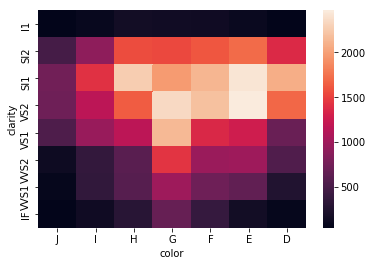

In [58]:
# bulk of the data is in the middle
sns.heatmap(col_clar_ct)

In [59]:
cut_color_ct = diamonds.pivot_table(index='cut', columns='color', aggfunc='size')
cut_color_ct

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,119,175,303,314,312,224,163
Good,307,522,702,871,909,933,662
Very Good,678,1204,1824,2299,2164,2400,1513
Premium,808,1428,2360,2924,2331,2337,1603
Ideal,896,2093,3115,4884,3826,3903,2834


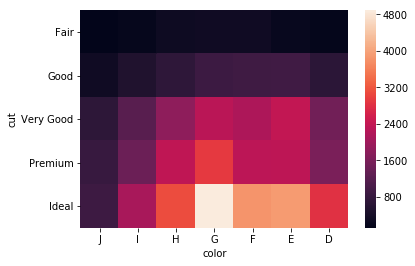

In [60]:
sns.heatmap(cut_color_ct)

# Your Turn #5
Do some analysis on categorical vs categorical data

In [61]:
# Code over there

## Categorical vs Continuous
All the plots in the categorical section in the [seaborn tutorial](http://seaborn.pydata.org/tutorial/categorical.html) will be of major help here. 

### A loose problem statement
The rest of the notebook will work on discovering how price per carat changes with respect to the variables. This variable does not exist yet so we will need to create it first.

In [62]:
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

### Comparing all categories vs all continuous variables
The plot below, plots the mean at every level of category for all the continuous variables. All three categorical variables are ordered and display in the given order.

Very interestingly, all the continuous variables decline as the categorical variables increase. carat, x, y, z, and table seem to be closely related to the size of the diamond and so it appears that it is harder and harder to find high-quality large diamonds.

The only continuous variable that increased is price per carat. I would have expected it to increase more for the higher quality diamonds, but unexpectedly it only increases a small amount and the highest quality diamonds do not always average the highest prices. Why is this so?

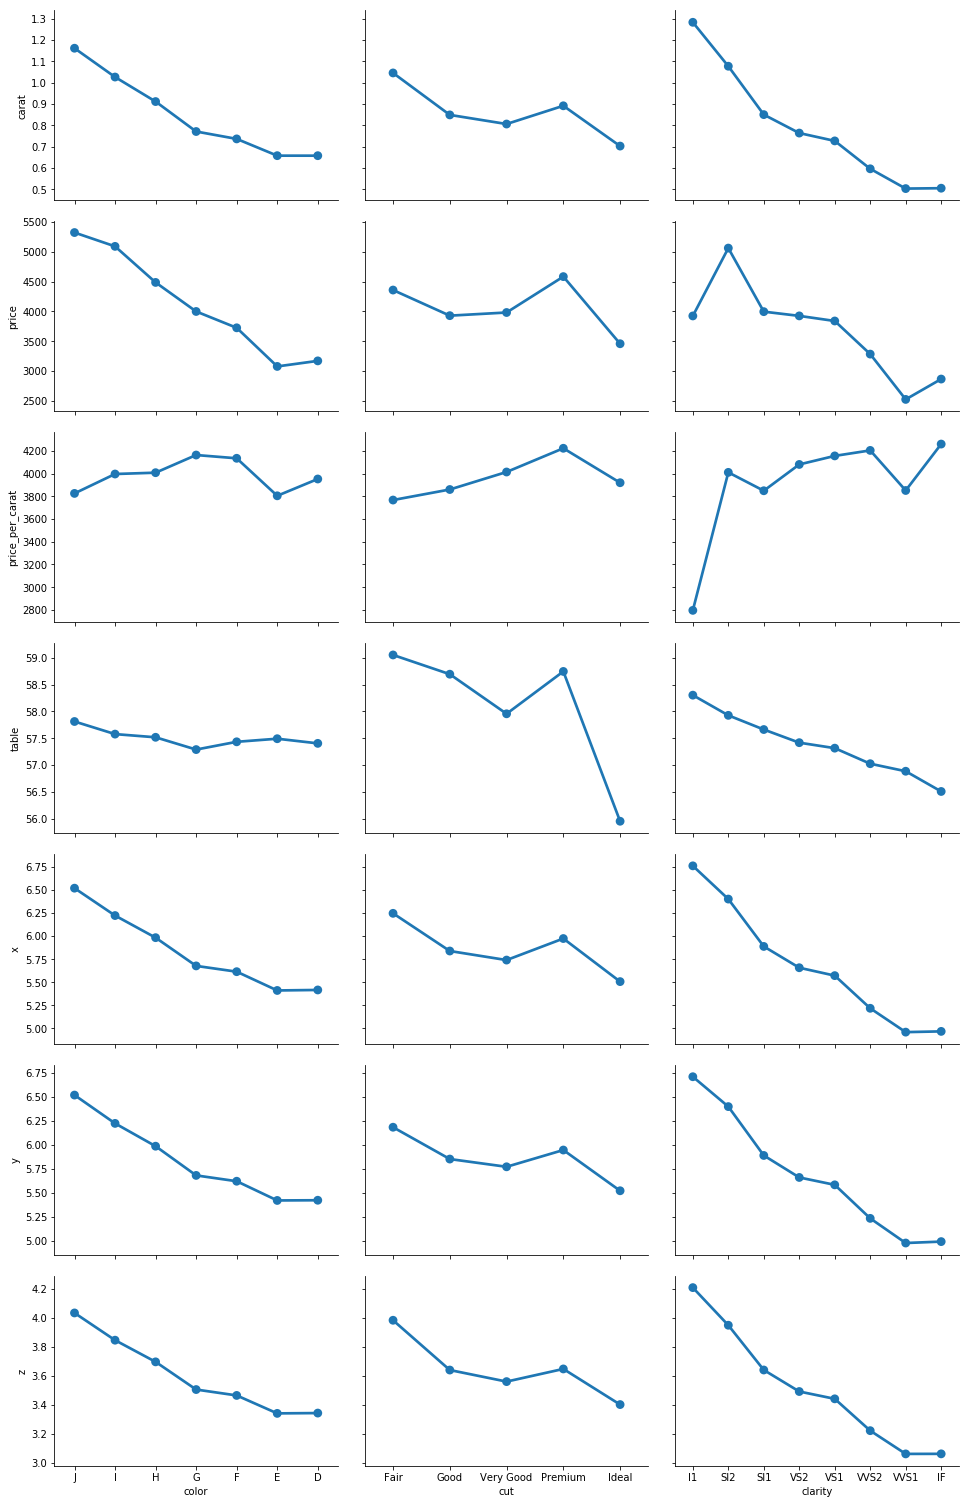

In [82]:
g = sns.PairGrid(diamonds,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["carat", "price", "price_per_carat", "table", "x", "y", "z"], height=3, aspect=1.5)
g.map(sns.pointplot, ci=0)

### Price per carat vs clarity and color
It does not seem like there is much of a relationship between price per carat and clarity and color unless you are looking at the first and last plots below.

The middle 6 plots all look virtually identical. The **I1** clarity graph is significantly less that the rest. Colors **E** and **D** in the **IF** clarity graph are also clearly above the result.

### Multiplicative effect
Since the clarity and color do not seem to have an effect until you have either awful or amazing diamonds, the effects of having both very good or both very poor might be like multiplying their values together for an even much larger gain.

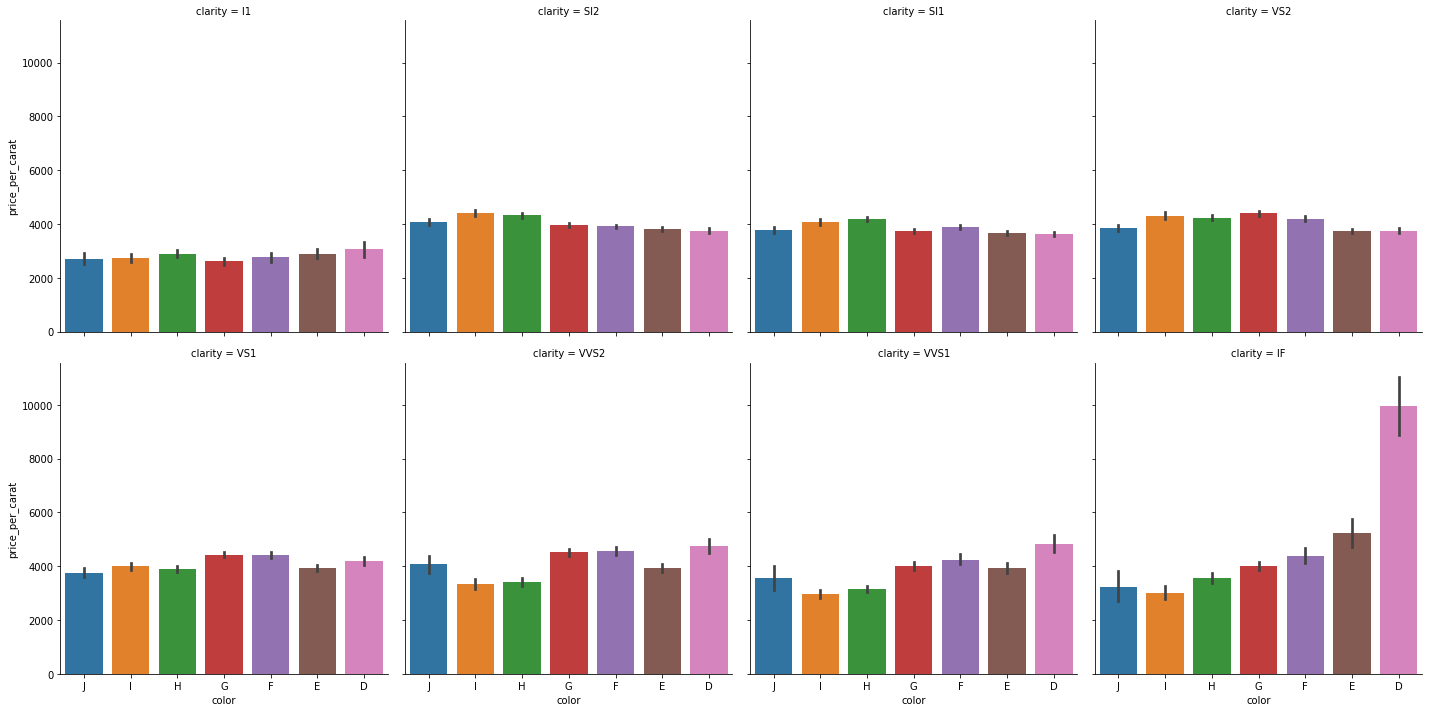

In [65]:
sns.catplot(x='color', y='price_per_carat', data=diamonds, kind='bar', col='clarity', col_wrap=4)

### cut might not have an effect
Plotting cut and color vs price per carat shows nearly identical graphs for all the cut types. Even **ideal** cut diamonds are no better than the others. The worst **color** **fair** cut diamonds tend to be a bit worse than average. But overall, cut does not look like it has much of an effect.

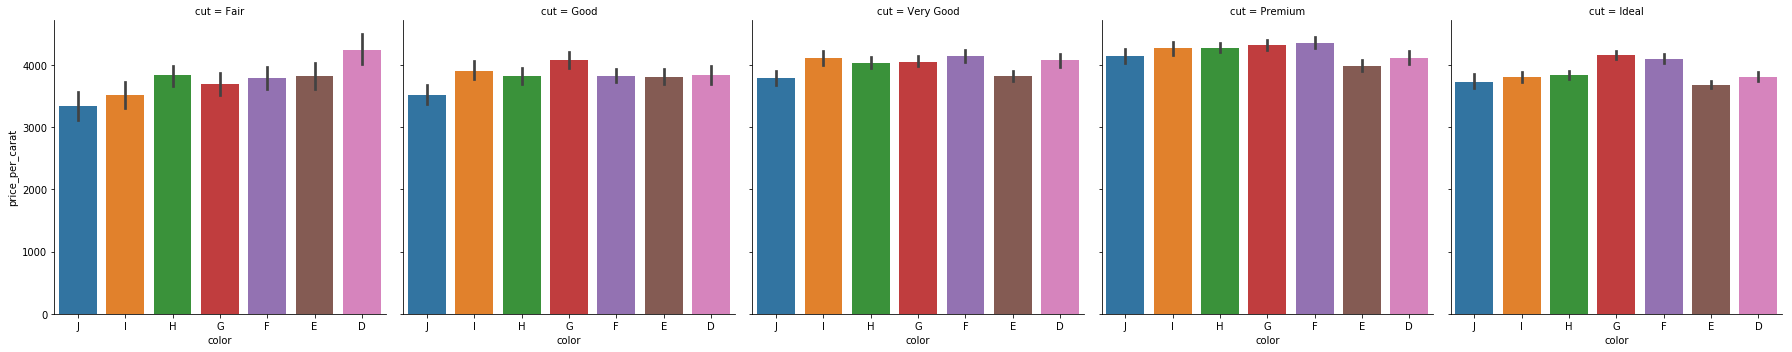

In [66]:
sns.catplot(x='color', y='price_per_carat', data=diamonds, kind='bar', col='cut')

### Heat map to identify high and low prices

In [67]:
color_clarity_price_mean = diamonds.pivot_table(index='color', columns='clarity', values='price_per_carat')

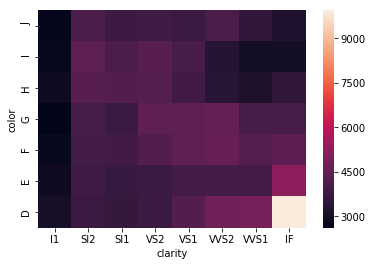

In [68]:
sns.heatmap(color_clarity_price_mean)

# Your Turn #6
Make some plots on categorical vs continuous variables

In [69]:
# Code over there

## Continuous vs Continuous
A pairwise scatter plot is a fantastic first assessment of the relationships between continuous variables. Examining every combination of continuous variables might make for a terribly large plot so using a heat/cluster map like the one below to first find the highest correlated variables can help narrow down the choices.

Coloring the points by a third variable aids quite in the understanding. It is clear that carat is highly correlated with price and price per carat. The variables x, y, and z were not used in this plot because they are highly correlated with one another and highly correlated with carat. The variable carat essentially takes the place for the other variables.

Since the diamond dataset is fairly large, plotting 50,000 points will take some time. Many points will overlap. To help alleviate this computational load, use the **`sample`** method to select a random sample of the data. The marker size of each point has also been set.

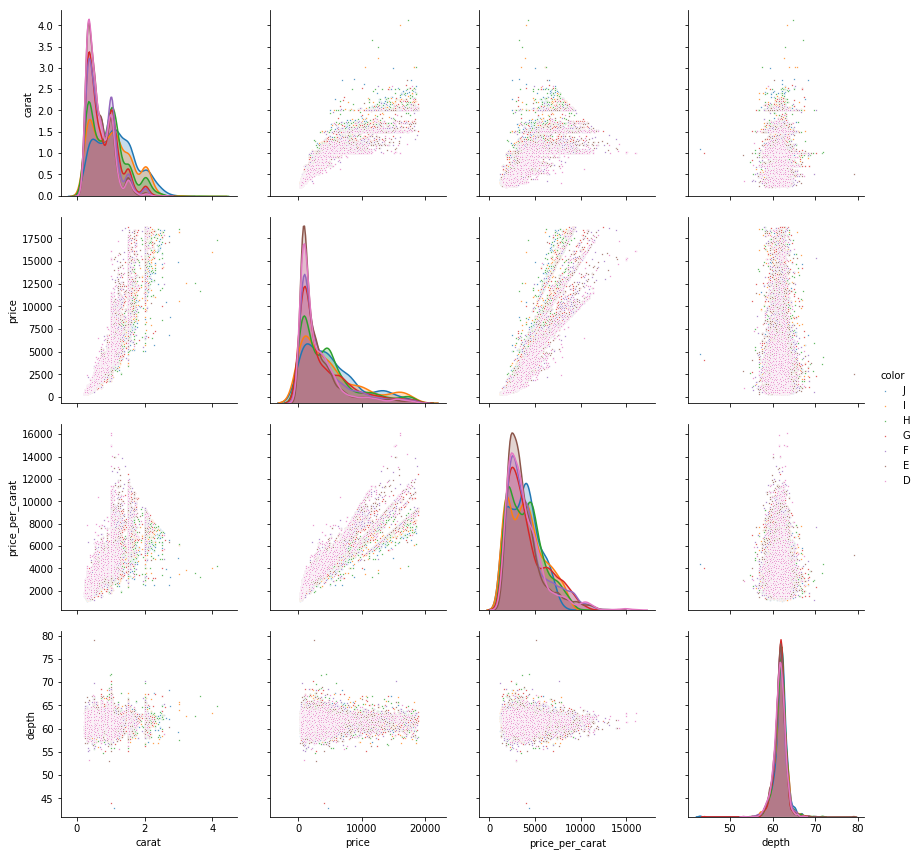

In [71]:
sns.pairplot(diamonds.sample(frac=.3), 
             diag_kind='kde',
             vars=['carat', 'price', 'price_per_carat', 'depth'],
             hue='color', 
             plot_kws={"s": 3}, 
             height=3)

### Selecting the **hue** by a different categorical variable
The above shows a clear relationship between carat and price. It also shows that the **color** of each stone is important. If we examine a vertical strip of data for carat vs price we notice that color **D** is always the highest.

But very interestingly, the frequency of color D stones decrease as carats increase. In fact, it appears there are almost no color D stones larger than 2 carats. Perhaps larger diamonds are of poorer quality.

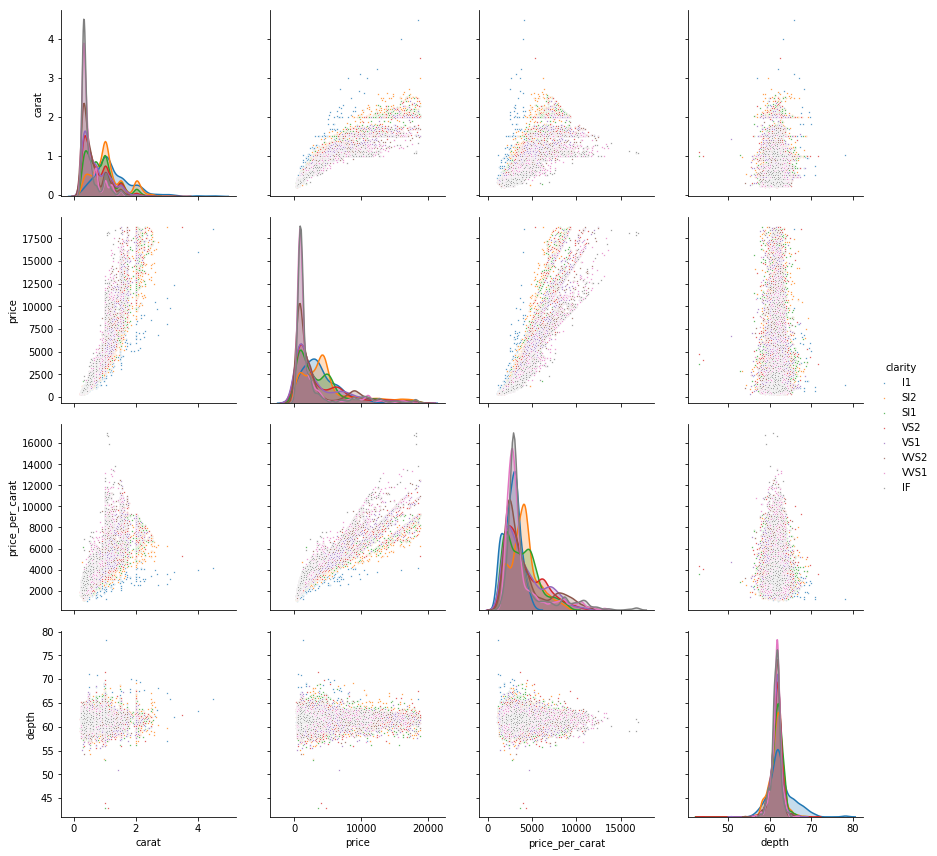

In [72]:
sns.pairplot(diamonds.sample(frac=.3), 
             diag_kind='kde',
             vars=['carat', 'price', 'price_per_carat', 'depth'],
             hue='clarity', 
             plot_kws={"s": 3}, 
             height=3)

### Clustering
The variables, price, price per carat, carat, x, y and z are all very tightly clustered together and all highly correlated with one another. The hierarchical cluster map makes this easy to spot.

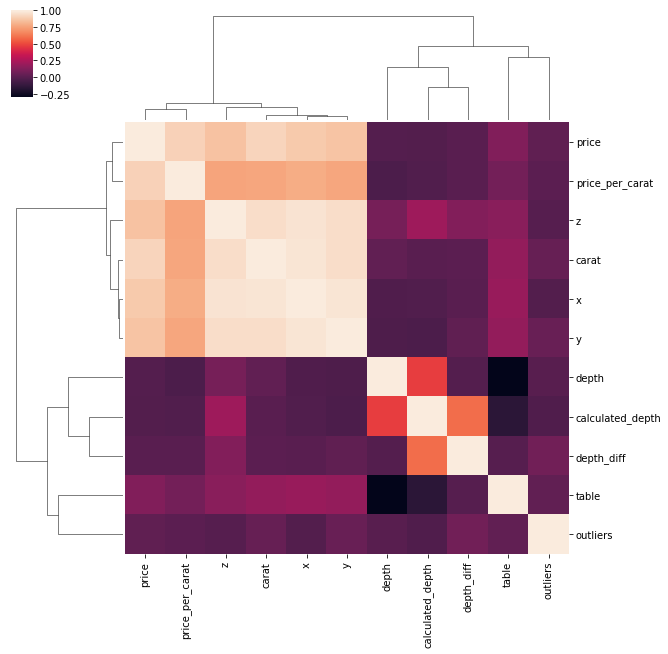

In [73]:
sns.clustermap(diamonds.corr())

# Your Turn #7
Do some continuous vs continuous analysis

## Uneven distribution of high quality diamonds
The scatter plots above indicate that higher quality diamonds tend to me smaller in size. Take a look at the box plots below. It is clear that the higest quality diamonds, D color and IF clarity are much lower average carat size. The largest diamonds are the worst quality.

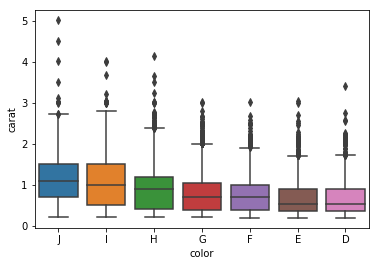

In [74]:
sns.boxplot(x='color', y='carat', data=diamonds)

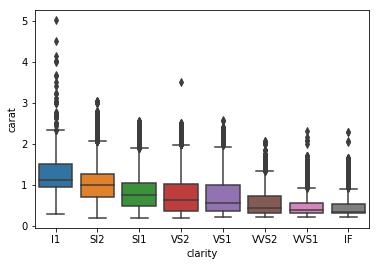

In [75]:
sns.boxplot(x='clarity', y='carat', data=diamonds)

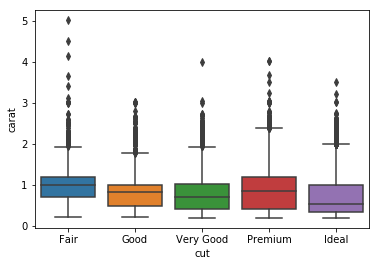

In [76]:
sns.boxplot(x='cut', y='carat', data=diamonds)

### Making a categorical variable out of a continuous variable
Occasionally, you will want to code different ranges of a continuous variable as a categorical variable as was talked about with numerical grades converting to letter grades.

Our point plots from way above indicated that price decreased as the quality of diamonds increased. How was that possible? Our above box plots indicate that the highest quality diamonds tend to be much smaller on average but larger diamonds are also more expensive. This explains the paradox.

To help visualize diamonds of about the same size we can turn our continuous variable **`carat`** into a categorical one with the **`pd.qcut`** function. This will cut the data into equally sized bins.

In [77]:
# this creates 10 equal sized bins
diamonds['carat_category'] = pd.qcut(diamonds['carat'], 5)

In [78]:
diamonds['carat_category'].value_counts()

(0.53, 0.9]      12017
(0.199, 0.35]    11058
(1.13, 5.01]     10687
(0.35, 0.53]     10527
(0.9, 1.13]       9651
Name: carat_category, dtype: int64

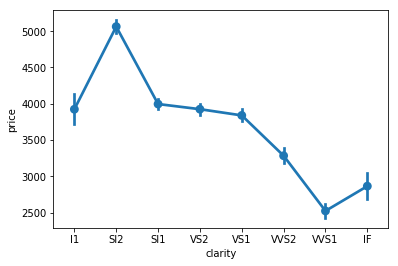

In [79]:
# original
sns.pointplot(x='clarity', y='price', data=diamonds)

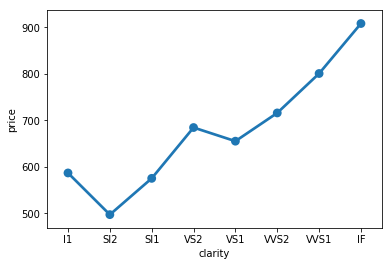

In [80]:
# small diamonds
diamonds_small = diamonds[diamonds['carat_category'].cat.codes == 0]
sns.pointplot(x='clarity', y='price', data=diamonds_small, ci=0)

# The diamond story in one plot
This one plot tells the diamond story. As carat increases, price goes up but it also increases as color and clarity improve.

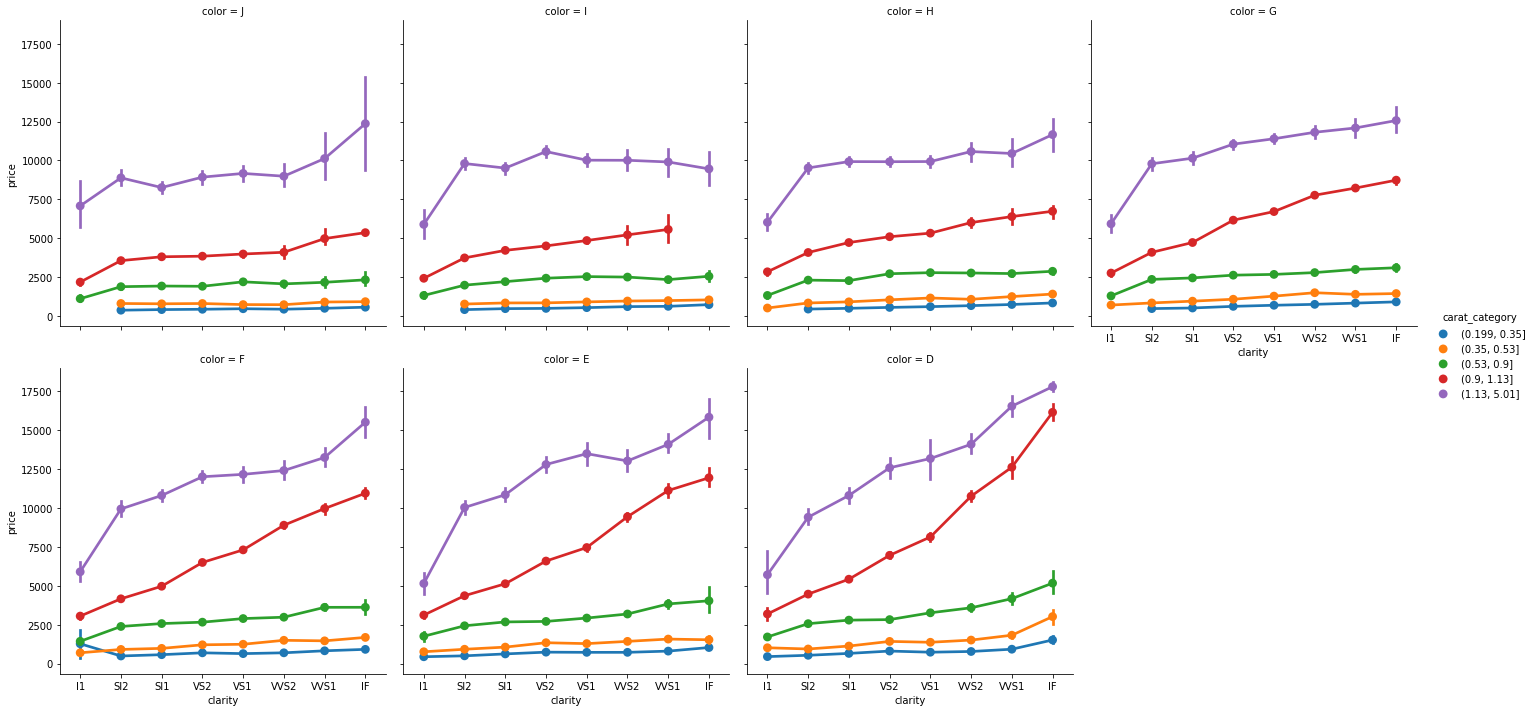

In [81]:
sns.catplot(x='clarity', y='price', data=diamonds, hue='carat_category', col='color', col_wrap=4, kind='point')

# Your Turn #8
Make a categorical variable out a continuous variable and use it to make a plot.